# Classification

## the classification problem is as follows:

Given the state_id, district_id, count_no, gender of defendent and petitioner, gender of advocated of defendent and petitioner, is it possible to classify whether a particular court case is a criminal case or not? 
The problem mainly looks at the role of the demographics and the gender of the subjects involved in a particular case to classify as criminal or not criminal case. 

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## Import all the case files

- sample a fraction of 0.0015, importing all files together without sampling is not possible due to limitation in RAM
- then combined these sampled case files

In [2]:
case_10 = pd.read_csv('cases/cases_2010.csv')
case_10 = case_10.sample(frac=0.0015)

In [3]:
case_11 = pd.read_csv('cases/cases_2011.csv')
case_11 = case_11.sample(frac=0.0015)

In [4]:
case_12 = pd.read_csv('cases/cases_2012.csv')
case_12 = case_12.sample(frac=0.0015)

In [5]:
case_13 = pd.read_csv('cases/cases_2013.csv')
case_13 = case_13.sample(frac=0.0015)

In [6]:
case_14 = pd.read_csv('cases/cases_2014.csv')
case_14 = case_14.sample(frac=0.0015)

In [7]:
case_15 = pd.read_csv('cases/cases_2015.csv')
case_15 = case_15.sample(frac=0.0015)

In [8]:
case_16 = pd.read_csv('cases/cases_2016.csv')
case_16 = case_16.sample(frac=0.0015)

In [9]:
case_17 = pd.read_csv('cases/cases_2017.csv')
case_17 = case_17.sample(frac=0.0015)

In [10]:
case_18 = pd.read_csv('cases/cases_2018.csv')
case_18 = case_18.sample(frac=0.0015)

In [11]:
cases_sampled= pd.concat([case_10, case_11, case_12, case_13, case_14, case_15, case_16, case_17, case_18])

In [12]:
cases_sampled.shape

(121403, 19)

In [13]:
cases_sampled.head()

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
1359186,03-20-06-201200141462010,2010,3,20,6,KABC0B0003052010,small cause court,0 male,0 male,-9999,-9999,572.0,2346.0,15,2010-02-22,2013-11-21,2011-04-28,2013-11-13,2013-11-21
1290164,03-20-01-201200291662010,2010,3,20,1,KABC020311842010,small cause court,0 male,-9998 unclear,-9999,0,572.0,4946.0,22,2010-02-22,2016-01-16,2013-06-21,2015-11-27,2016-01-16
384590,01-21-02-203403002662010,2010,1,21,2,MHTH030050872010,judicial magistrate court,0 male,-9998 unclear,-9999,-9999,4400.0,3006.0,25,2010-01-20,2011-07-13,2011-02-08,2011-03-14,2011-03-25
1244410,03-17-12-201200001392010,2010,3,17,12,KACM400001372010,judicial magistrate court,0 male,0 male,-9999,-9999,572.0,384.0,19,2010-02-04,2010-02-26,NaN,2010-02-26,2010-02-26
3699560,22-18-03-204301001182010,2010,22,18,3,PBHO010000562010,district and sessions court,0 male,1 female,-9999,0,2875.0,1963.0,5,2010-08-26,2012-12-03,2011-09-05,2012-11-30,2012-12-03


## building the dataset

- import the acts_section file from which we will get the information on whether the case is criminal case or not based on the case id

In [14]:
acts = pd.read_csv('acts_sections.csv')

C:\Users\karun\AppData\Local\Temp\ipykernel_15304\3946893071.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  acts = pd.read_csv('acts_sections.csv')


- from the 120k sampled files, extract only the ones which have information of whether the case is a criminal case or not

In [15]:
case_ids = list(acts['ddl_case_id'])
new_sample = cases_sampled[cases_sampled['ddl_case_id'].isin(case_ids)]

In [16]:
case_ids = list(new_sample['ddl_case_id'])
acts = acts[acts['ddl_case_id'].isin(case_ids)]

In [17]:
new_sample = pd.merge(new_sample, acts, how='left', on='ddl_case_id')

In [18]:
new_sample.isna().sum()

ddl_case_id                0
year                       0
state_code                 0
dist_code                  0
court_no                   0
cino                       0
judge_position             0
female_defendant           0
female_petitioner          0
female_adv_def             0
female_adv_pet             0
type_name                  0
purpose_name            2534
disp_name                  0
date_of_filing             0
date_of_decision       28814
date_first_list         2919
date_last_list           610
date_next_list          1837
act                       12
section                 6052
bailable_ipc           76563
number_sections_ipc    72462
criminal                   0
dtype: int64

## data preprocessing

In [19]:
new_sample=new_sample.drop(['bailable_ipc', 'number_sections_ipc','purpose_name','ddl_case_id', 'cino','date_of_decision'], axis=1)

In [20]:
clean_sample = new_sample.dropna()

In [21]:
clean_sample.isna().sum(), clean_sample.shape

(year                 0
 state_code           0
 dist_code            0
 court_no             0
 judge_position       0
 female_defendant     0
 female_petitioner    0
 female_adv_def       0
 female_adv_pet       0
 type_name            0
 disp_name            0
 date_of_filing       0
 date_first_list      0
 date_last_list       0
 date_next_list       0
 act                  0
 section              0
 criminal             0
 dtype: int64,
 (89879, 18))

In [22]:
clean_sample=clean_sample.drop(['act', 'section','type_name','disp_name', 'date_of_filing', 'date_first_list', 'date_last_list','date_next_list' ], axis=1)

- after dropping columns with too many missing values, rows with some missing values, columns which won't be necessary we have the final clean dataset which can be used
- now we can split the dataset into feature and target

In [23]:
y = clean_sample['criminal']
X = clean_sample.drop(['criminal'], axis=1)

In [24]:
X.dtypes

year                  int64
state_code            int64
dist_code             int64
court_no              int64
judge_position       object
female_defendant     object
female_petitioner    object
female_adv_def        int64
female_adv_pet        int64
dtype: object

- where possible, map the string values to integers

In [25]:
gender_map={'0 male':0, '-9998 unclear':-9998, '1 female': 1, '-9999 missing name': -9999}
X['female_defendant'] = X['female_defendant'].map(gender_map)
X['female_petitioner'] = X['female_petitioner'].map(gender_map)

- one hot encoding of the judges position

In [26]:
OHE = OneHotEncoder(sparse=False, drop='first')
judge_pos = OHE.fit_transform(X[['judge_position']])

c:\Users\karun\miniconda3\envs\OtherProjects\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\karun\miniconda3\envs\OtherProjects\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\karun\miniconda3\envs\OtherProjects\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\karun\miniconda3\envs\OtherProjects\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a

In [27]:
X=X.drop(['judge_position'], axis=1)

In [28]:
judge_position = pd.DataFrame(judge_pos, columns = ["Position_"+str(int(i)) for i in range(judge_pos.shape[1])])

In [29]:
X.shape, judge_position.shape

((89879, 8), (89879, 361))

- combining the rest of the dataset with the dataframe created from the one hot encoded array of judges position

In [30]:
X = pd.concat([X.reset_index(drop=True), judge_position.reset_index(drop=True)], axis=1)

## train test split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## classification model 1 - Logistic Regression

In [38]:
clf_1 = LogisticRegression(random_state=0)
clf_1.fit(X_train, Y_train)
Y_pred = clf_1.predict(X_test)
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79     11979
           1       0.49      0.12      0.19      5997

    accuracy                           0.66     17976
   macro avg       0.58      0.53      0.49     17976
weighted avg       0.62      0.66      0.59     17976



## classification model 2 - K nearest neighbors

In [39]:
clf_2 = KNeighborsClassifier(n_neighbors=2)
clf_2.fit(X_train, Y_train)
Y_pred = clf_2.predict(X_test.values)
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82     11979
           1       0.66      0.37      0.48      5997

    accuracy                           0.73     17976
   macro avg       0.70      0.64      0.65     17976
weighted avg       0.72      0.73      0.70     17976



## classification model 3 - SGD Classifier

In [40]:
clf_3 = make_pipeline(StandardScaler(), SGDClassifier(max_iter=10000, tol=1e-3))
clf_3.fit(X_train, Y_train)
Y_pred = clf_3.predict(X_test.values)
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.96      0.79     11979
           1       0.51      0.09      0.15      5997

    accuracy                           0.67     17976
   macro avg       0.59      0.52      0.47     17976
weighted avg       0.62      0.67      0.58     17976



In [41]:
clf_4 = GaussianNB()
clf_4.fit(X_train, Y_train)
Y_pred=clf_4.predict(X_test)
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.45      0.58     11979
           1       0.42      0.80      0.55      5997

    accuracy                           0.57     17976
   macro avg       0.62      0.63      0.57     17976
weighted avg       0.69      0.57      0.57     17976



## comparison in accuracy

Text(0, 0.5, 'accuracy')

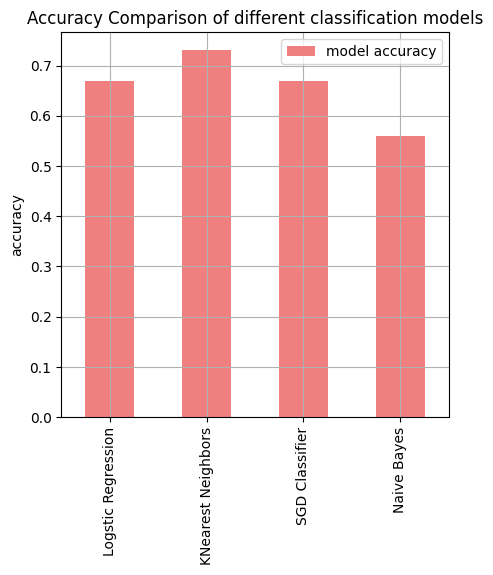

In [36]:
plotdata = pd.DataFrame({"model accuracy":[0.67, 0.73, 0.67, 0.56]}, index=["Logstic Regression", "KNearest Neighbors", "SGD Classifier", "Naive Bayes"])
plotdata.plot(kind="bar",figsize=(5, 5), color='lightcoral', grid=True)
plt.title("Accuracy Comparison of different classification models")
plt.ylabel("accuracy")

### insights

- on trying the most popular classification models, the one which gave the highest accuracy is K Nearest Neighbors- 73%
- Logistic Regrssion and SGD Classifiers have the same accuracy of 67%, while the least was that of Naive Bayes with 56%

- considering that the classification was done purely based on the location of the case and the gender of the different parties involved, 73% is a good accuracy percent
- this tells us that certain locations and genders can give insights on the severity of the crime
- naive bayes relies on feature independence for its classification. A poor performance implies that the features used for the classification task are not completely independent of each other

- KNN, Logistic Regression, SGD Classifier- high recall for class 0 => they are good at accurately identifying all the tru class 0 datapoints (non criminal cases)